In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Preperation data before
-------------

In [20]:
img = mpimg.imread('image.png')

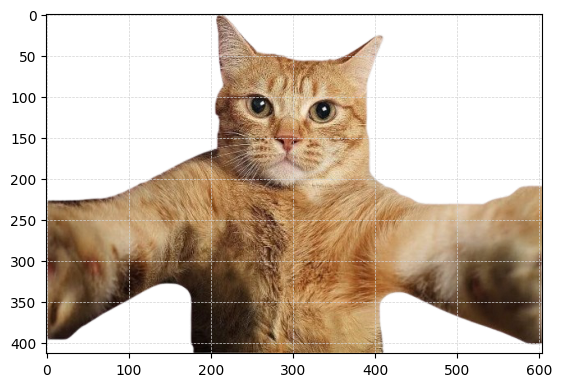

In [21]:
plt.imshow(img, cmap='gray')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
plt.show()



In [22]:
# do not need this function
def img_shape_correction(array):
    H, W, C = array.shape
    differ = W - H
    k = np.pad(img, mode = 'constant', pad_width=((differ, 0), (0, 0), (0, 0))) if differ >= 0 else np.pad(img, mode = 'constant', pad_width=((0, 0), (0, -differ), (0, 0)))
    return k


In [23]:
def img_3d_to_2d(array):
    # array = img_shape_correction(array)
    H, W, C = array.shape
    x = np.tile(np.arange(W), H)
    y = np.repeat(np.arange(H), W)
    rgb = array.reshape(H * W, C)
    r = rgb[:, 0]
    g = rgb[:, 1]
    b = rgb[:, 2]
    t = rgb[:, 3]
    output_array = np.stack([
        x, y, r, g, b, t
    ])
    return output_array

In [24]:
def vizualization_2d(array):
    colors = np.stack([array[2], array[3], array[4], array[5]], axis=1)
    plt.scatter(
        array[0],
        array[1],
        c=colors,
        s=10
    )
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

In [25]:
#also dont work with 1.5
def img_2d_to_3d(array):
    size = array[0][-1].astype(np.int32) + 1
    shape_3d = (size, size, 4)
    row = array[0, :].astype(np.int32)
    column = array[1, :].astype(np.int32)
    r = array[2, :]
    g = array[3, :]
    b = array[4, :]
    t = array[5, :]
    array_3d = np.zeros(shape_3d, dtype= r.dtype)
    array_3d[row, column, 0] = r
    array_3d[row, column, 1] = g
    array_3d[row, column, 2] = b
    array_3d[row, column, 3] = t
    return array_3d


## Task 1

In [26]:
def stretch(X,a,b):
    X = X if len(X.shape) == 2 else img_3d_to_2d(X)
    return np.diag(np.array([a, b, 1, 1, 1, 1 ])) @ X

In [27]:
def shear(X,a,b):
    X = X if len(X.shape) == 2 else img_3d_to_2d(X)
    M = np.eye(6, dtype=float)
    M[0, 1] = a
    M[1, 0] = b
    return M @ X


In [28]:
def rotation(X, teta):
    X = X if len(X.shape) == 2 else img_3d_to_2d(X)
    angle = np.deg2rad(teta)
    M = np.diag(np.array([np.cos(angle), np.cos(angle), 1, 1, 1, 1 ]))
    M[0, 1] = - np.sin(angle)
    M[1, 0] = np.sin(angle)
    return M @ X

In [29]:
def reflection(X,a,b):
    X = X if len(X.shape) == 2 else img_3d_to_2d(X)
    M = np.diag(np.array([a**2 - b**2, b**2 - a**2, 1, 1, 1, 1 ]))
    M[0, 1] = 2*a*b
    M[1, 0] = 2*a*b
    M[0:2, 0:2] = (1/(a**2 + b**2)) * M[0:2, 0:2]
    return M @ X


In [30]:
k = img_3d_to_2d(img)

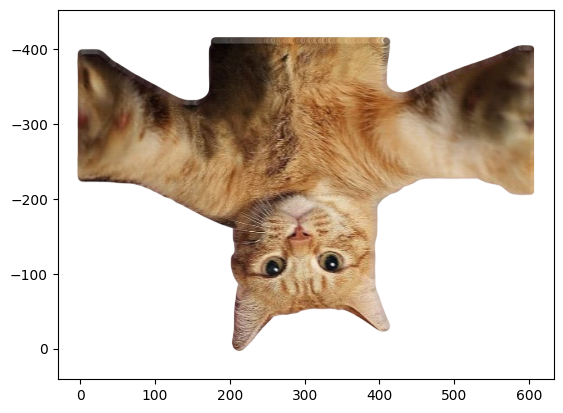

In [31]:
vizualization_2d(reflection(k, 1, 0))

## Task 2

In [32]:
q = stretch(shear(rotation(k, 45), 3, 5), 0.6, 2)
l = shear(stretch(rotation(k, 45), 0.6, 2), 3, 5)
m = rotation(stretch(shear(k, 3, 5), 0.6, 2), 45)


In [48]:
import pandas as pd
pd.DataFrame(q[:,:4])

,0,1,2,3
0,0.0,1.697056,3.394113,5.091169
1,0.0,8.485281,16.970563,25.455844
2,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000


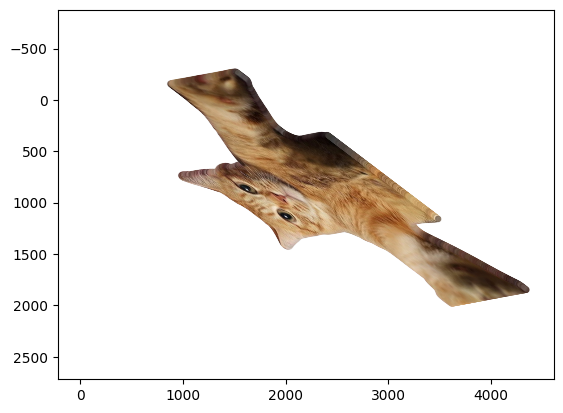

In [33]:
vizualization_2d(l)

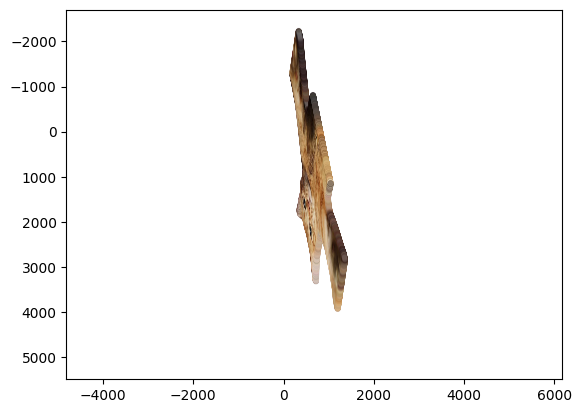

In [34]:
vizualization_2d(q)


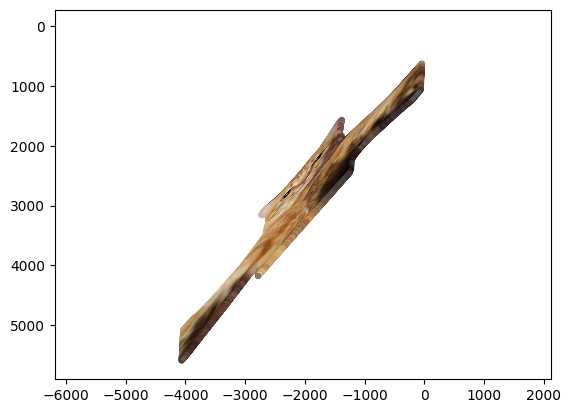

In [35]:
vizualization_2d(m)

In [36]:
def read_off(filename: str):
    with open(filename, 'r') as f:
        # Перевіряємо, чи перший рядок починається з OFF
        if 'OFF' != f.readline().strip():
            raise ValueError('Not a valid OFF header')

        # Зчитуємо кількість вершин, граней та ребер
        n_verts, n_faces, _ = map(int, f.readline().strip().split())

        # Зчитуємо координати всіх вершин (x, y, z)
        verts = [list(map(float, f.readline().strip().split())) for _ in range(n_verts)]

        # Зчитуємо грані (перше число у рядку — кількість вершин грані, ігноруємо)
        faces = [list(map(int, f.readline().strip().split()[1:])) for _ in range(n_faces)]

        # Повертаємо вершини (NumPy масив) і список граней
        return np.array(verts), faces

vertices, faces = read_off(r"/Users/alona/Downloads/archive/ModelNet40/sink/test/sink_0129.off")
print(vertices.shape)
print(faces[:3])
print(vertices)

(12620, 3)
[[0, 1, 2], [1, 0, 3], [2, 8, 9]]
[[ 5.30171e-01  1.02954e-01  2.10835e+00]
 [ 5.41800e-01 -1.51172e-02  2.27239e+00]
 [ 5.41800e-01 -1.51172e-02  2.10835e+00]
 ...
 [ 1.64540e+00 -6.94995e-01  2.56346e+00]
 [ 1.78935e+00  3.92000e-05  2.56346e+00]
 [ 1.78935e+00  3.92000e-05  2.56346e+00]]


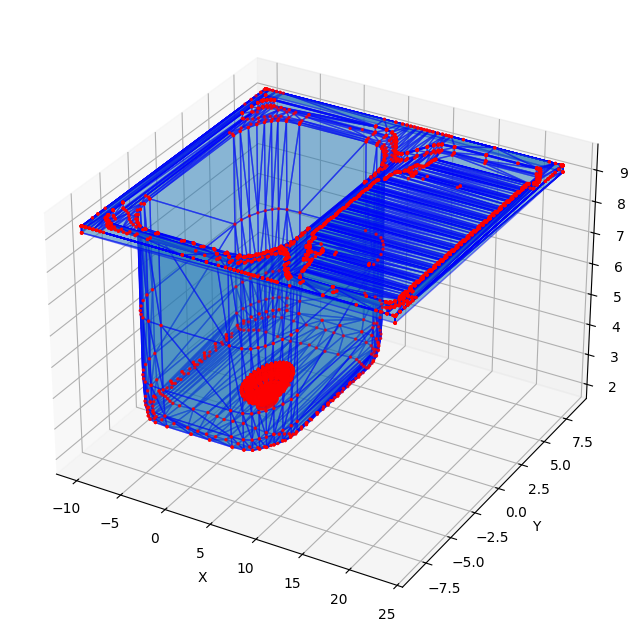

In [37]:
# Імпортуємо matplotlib для побудови 3D-графіків
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Функція для візуалізації OFF-моделі у вигляді сітки та точок
# (зручно бачити, як змінюється модель після трансформацій)
def plot_off(vertices, faces):
    fig = plt.figure(figsize=(8, 8))                   # створюємо вікно
    ax = fig.add_subplot(111, projection='3d')         # додаємо 3D координатну систему

    # Створюємо полігональну сітку з граней (faces) та додаємо її на графік
    mesh = Poly3DCollection([vertices[face] for face in faces],
                            alpha=0.3, edgecolor='b')  # прозорість 0.3, чорні ребра
    ax.add_collection3d(mesh)

    # Додаємо вершини як червоні точки
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=2, c='r')

    # Підписуємо осі
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Автоматично масштабуємо сцену під модель
    ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])

    plt.show()  # показуємо результат


# Виклик функції для побудови OFF-моделі
plot_off(vertices, faces)

In [38]:
def rotate_xy (X,teta):
    angle = np.deg2rad(teta)
    M = np.diag(np.array([np.cos(angle), np.cos(angle), 1 ]))
    M[0, 1] = - np.sin(angle)
    M[1, 0] = np.sin(angle)
    return X @ M

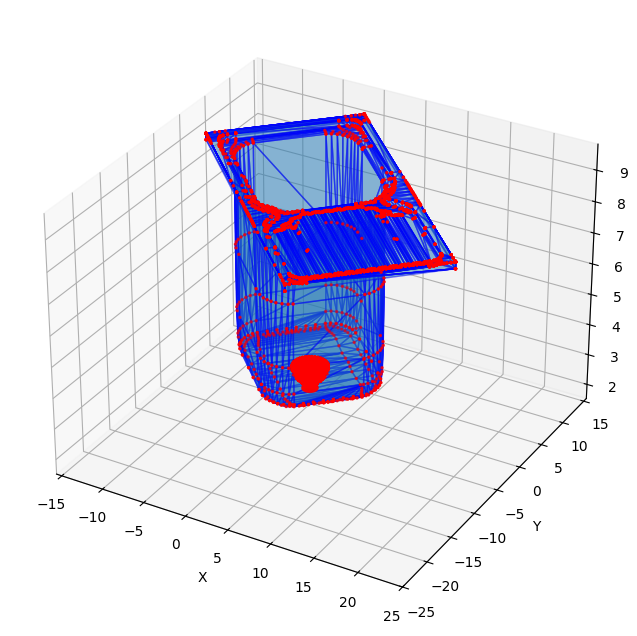

In [39]:
plot_off(rotate_xy(vertices, 45), faces)

In [40]:
def rotate_yz (X,teta):
    angle = np.deg2rad(teta)
    M = np.diag(np.array([1, np.cos(angle), np.cos(angle)]))
    M[1, 2] = - np.sin(angle)
    M[2, 1] = np.sin(angle)
    return X @ M

In [41]:
def rotate_xz (X,teta):
    angle = np.deg2rad(teta)
    M = np.diag(np.array([np.cos(angle), 1, np.cos(angle)]))
    M[0, 2] = - np.sin(angle)
    M[2, 0] = np.sin(angle)
    return X @ M

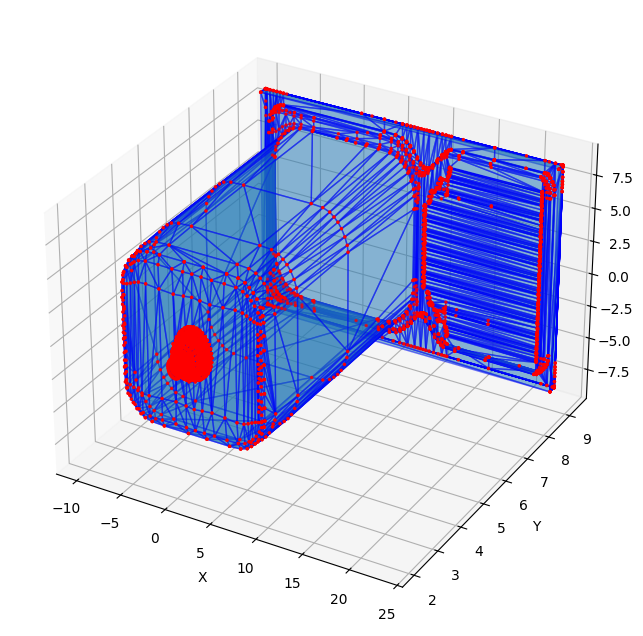

In [42]:
plot_off(rotate_yz(vertices, 90), faces)

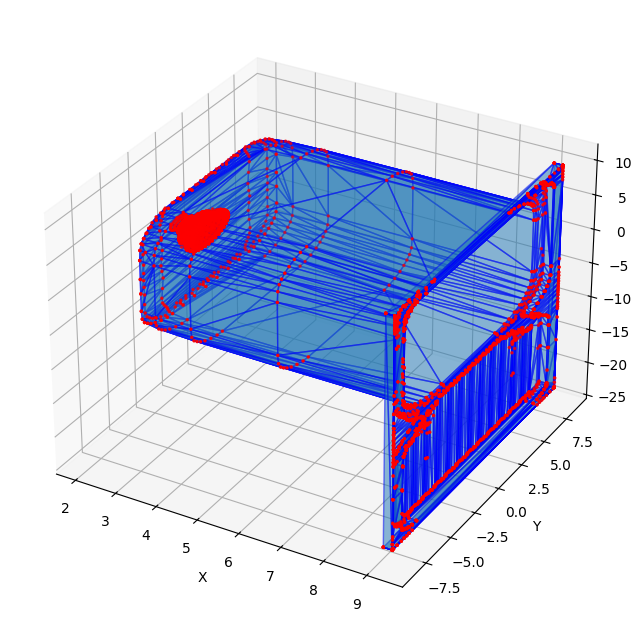

In [43]:
plot_off(rotate_xz(vertices, 90), faces)

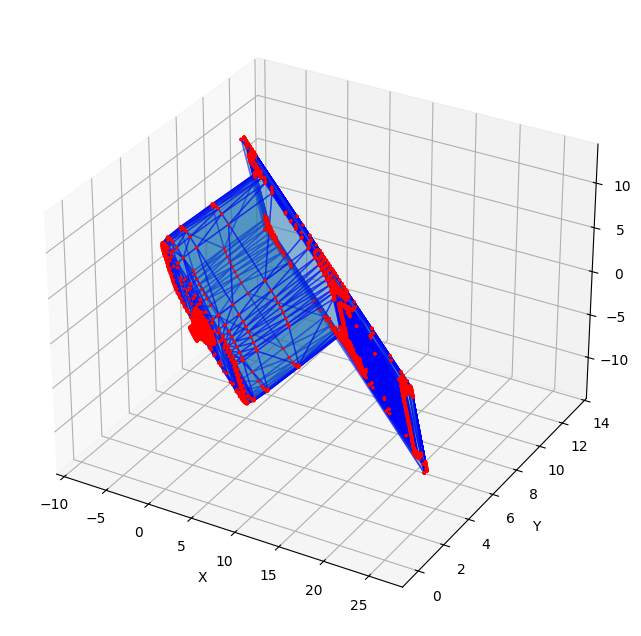

In [44]:
plot_off(rotate_xz(rotate_yz(rotate_xy(vertices, 45), 70), 60), faces)

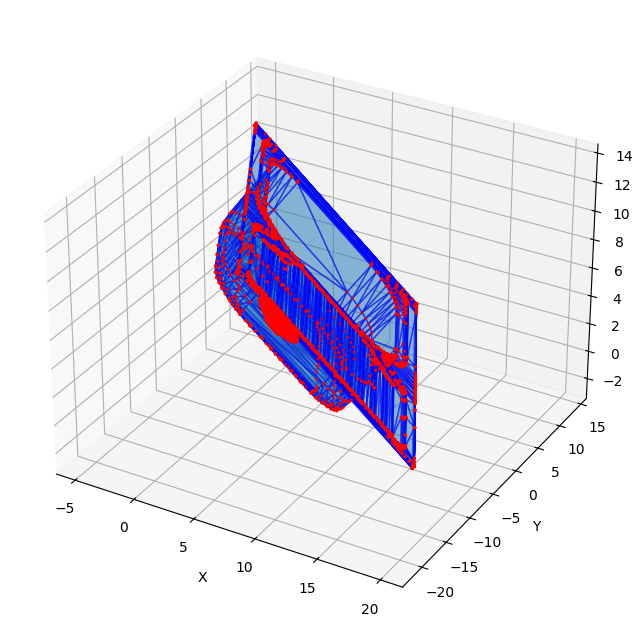

In [45]:
plot_off(rotate_yz(rotate_xy(rotate_xz(vertices, 60), 45), 70), faces)


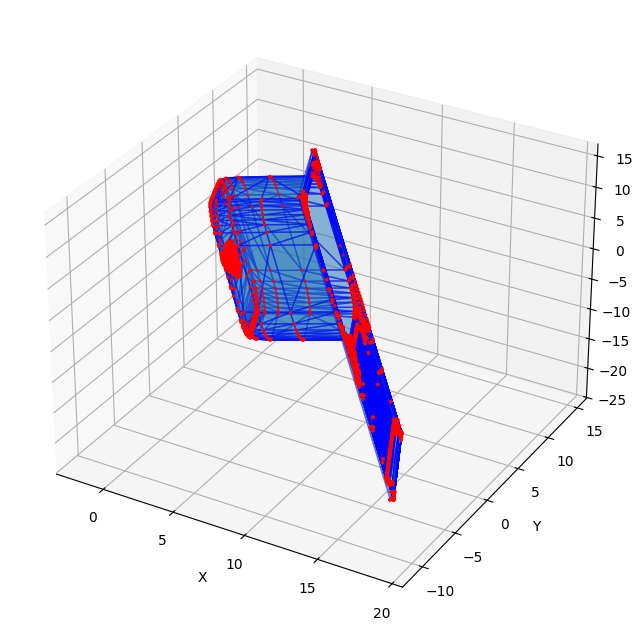

In [46]:
plot_off(rotate_xy(rotate_xz(rotate_yz(vertices, 70), 60), 45), faces)